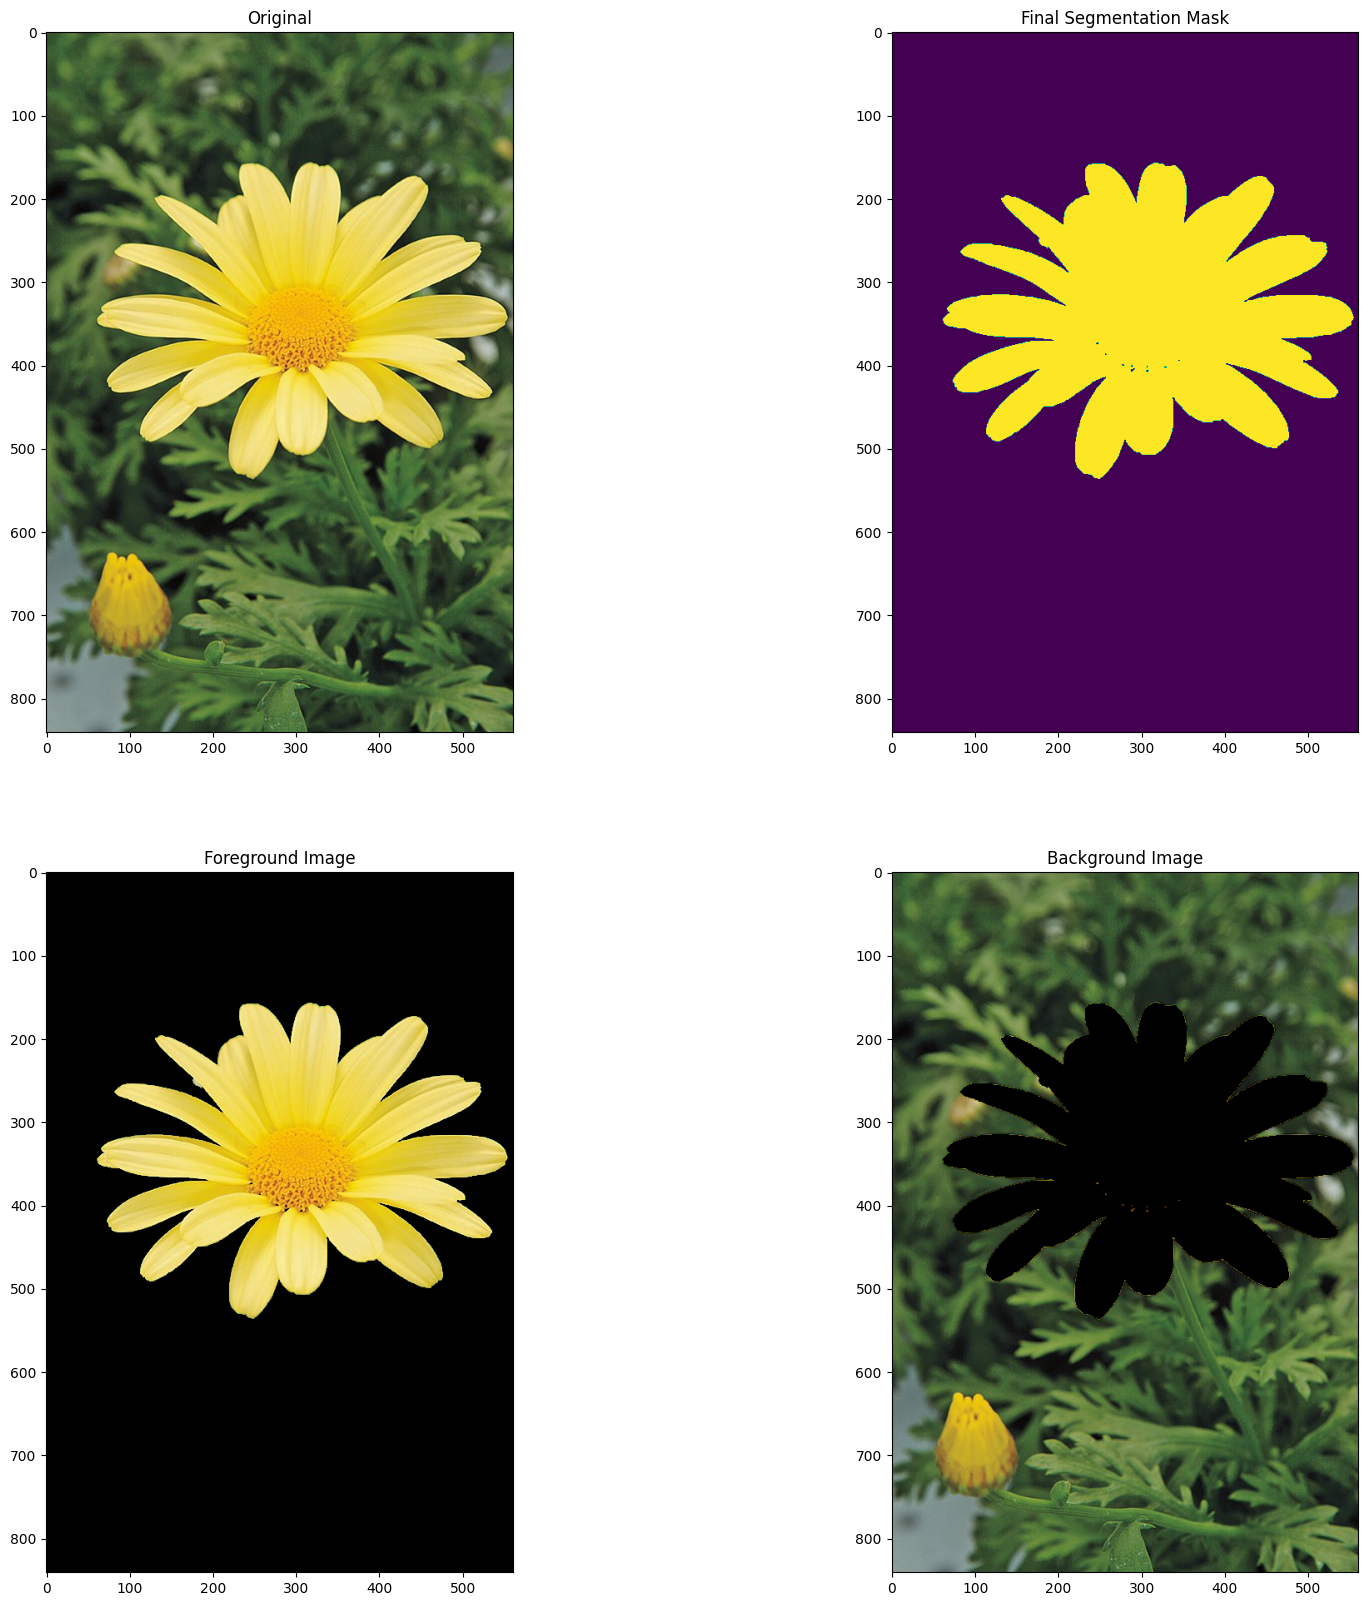

In [4]:
#Question 8 - Background Blurring

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reads the image
im = cv.imread('images/daisy.jpg')
assert im is not None
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

#Part (a) - Image Segmentation
mask = np.zeros(im.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (58, 154, 498, 466)
cv.grabCut(im,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = np.where((mask==2)|(mask==0),1,0).astype('uint8')
im_f = im*mask2[:,:,np.newaxis]
im_b = im*mask3[:,:,np.newaxis]

#Part (b) - Blurring
k = 11
blur_bg = cv.GaussianBlur(im_b, (k,k), 0)


fig, ax = plt.subplots(2,2, figsize = (20,20))
ax[0 , 0].imshow(im)
ax[0 , 0].set_title('Original')
ax[0 , 1].imshow(mask2)
ax[0 , 1].set_title('Final Segmentation Mask')
ax[1 , 0].imshow(im_f)
ax[1 , 0].set_title('Foreground Image')
ax[1 , 1].imshow(im_b)
ax[1 , 1].set_title('Background Image')
fig.suptitle('Initial Segmentation')
plt.show()
